# No 1
Tuliskan script untuk import pandas library dan library untuk klasifikasi menggunakan Decision Tree

In [0]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier

# No 2
Sebutkan setidaknya 2 library untuk fungsi visualisasi di python.

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# No 3
- Import loan_data.csv.

- Identifikasi tipe data dari masing-masing variable.

- Tampilkan 5 baris pertama dan tampilkan informasi summary statistics-nya.

## Load Data

In [119]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
data = pd.read_csv('/content/drive/My Drive/Buat Belajar/FINAL TEST BOS/loan_data.csv')

Data berhasil di import ke dalam notebook

## Tipe data masing-masing variable

In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [122]:
data.shape

(9578, 14)

Terdapat 14 fitur dalam data ini dengan tipe data sebagai berikut :
1. **credit.policy** dengan tipe data integer
2. **purpose** dengan tipe data string
3. **int.rate** dengan tipe data float
4. **installment** dengan tipe data float
5. **log.annual.inc** dengan tipe data float
6. **dti** dengan tipe data float
7. **fico** dengan tipe data integer
8. **days.with.cr.line** dengan tipe data float
9. **revol.bal** dengan tipe data integer
10. **revol.util** dengan tipe data float
11. **inq.last.6mths** dengan tipe integer
12. **deling.2yrs** dengan tipe integer
13. **pub.rec** dengan tipe integer
14. **not.fully.paid** dengan tipe integer


## Tampilkan 5 baris pertama
Berikut merupakan 5 baris pertama dari data ini

In [123]:
data.head(5)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


## Summary statistics
Berikut merupakan ringkasan statsitic dari data loan

In [124]:
data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


# No.4
Lakukan pengecekan missing data dan duplicated-row.

Jika ada, sebutkan kolom apa yang ada missing data.

Apakah ada duplicated-row?

## Check Missing Values

In [125]:
#Persentase Data yang Missing
sum(data.isnull().sum())/(data.shape[0]*data.shape[1])*100

0.0

Tidak ada data yang missing karena persentase data yang missing 0%

## Check Duplicate Row

In [126]:
data["is_duplicate"]= data.duplicated()
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,is_duplicate
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,False
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,False
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,False
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,False
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,False


In [127]:
dr = data.is_duplicate.value_counts()
dr

False    9578
Name: is_duplicate, dtype: int64

Karena tidak ada value **True** maka dapat dikatakan tidak ada data duplikat dalam dataset loan ini.

In [0]:
del data['is_duplicate']

# No. 5
Lakukan pengecekan variabel target.

Ada berapa kategori pada variable target?

Berapa proporsinya?

Lakukan visualisasi yang menunjukkan PROPORSI kelas target.

## Pengecekan Variabel Target

In [129]:
data['not.fully.paid'].head()

0    0
1    0
2    0
3    0
4    0
Name: not.fully.paid, dtype: int64

Credit policy merupakan target dari dataset loan ini. Karena tujuan dari pengolahan data ini menggunakan klasifikasi yaitu untuk mengetahui apakah konsumen dapat diberikan polis kredit dari pinjaman yang mereka lakukan.

## Jumlah kategori target

In [130]:
cat = data['not.fully.paid'].value_counts()
cat

0    8045
1    1533
Name: not.fully.paid, dtype: int64

Terdapat 2 kategori dalam variabel target yaitu kategori 0 dan 1

## Porsi Kategori Target

Porsi Kategori target yaitu 
- 80 persen untuk data dengan kategori target 1
- 20 persen untuk data dengan kategori target 2

##  Visualisasi Proporsi Kelas Target

<function matplotlib.pyplot.show>

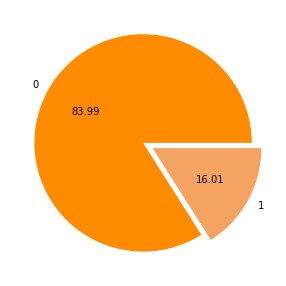

In [131]:
colors = ['darkorange', 'sandybrown']
explode = (0, 0.1)

plt.figure(figsize=(5,5))
plt.pie(cat, labels=cat.index, autopct='%.2f',colors=colors,explode=explode)
plt.show

# No. 6 
 Berapa variansi (ragam) nilai installment?

In [132]:
data['installment'].var()

42878.52390484531

Varians (ragam) dari feature installment adalah 42878.52

# No. 7
Berapa nilai simpangan kuartil pada variable ‘installment’?

In [133]:
Q1 = data['installment'].quantile(q=0.25)
Q3 = data['installment'].quantile(q=0.75)
simpangan = Q3 -Q1
simpangan

268.99249999999995

Nilai simpangan quartile pada variable installment yaitu sebesar 268.99

#No.8 (Belum)
Berapa nilai installment tertinggi untuk masing-masing tujuan pinjaman (masing-masing kategori pada variable ‘purpose’)?

#No. 9
Variable ‘purpose’ menunjukkan tujuan pengajuan pinjaman.

Ada berapa kategori pada variable tersebut?

Visualisasikan frekuensi pinjaman berdasarkan tujuannya, diurutkan dari frekuensi tertinggi.

## Jumlah Kategori dalam Variable purpose

In [134]:
purpose = data['purpose'].value_counts()
purpose

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

## Visualisasi Variable Purpose

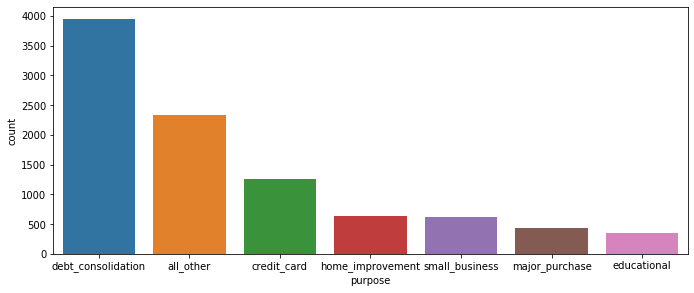

In [135]:
f=plt.figure(figsize=(25,10))
f.add_subplot(2,2,1)
sns.countplot(data['purpose'], order=data['purpose'].value_counts().index)

Berdasarkan visualisasi tersebut, dapat diketahui **debt consolidatio** merupakan tujuan paling banyak konsumen melakukan pinjaman, dilanjutkan dengan tujuan lainnya seperti **all_other, credit_card, home_improvement, small_business, major_purchase** sedangkan **educational** merupakan tujuan paling sedikit konsumen melakukan pinjaman.

#No. 10
Apakah variable ‘fico’ merupakan predictor yang potensial untuk memprediksi target? Jelaskan argumen anda. Hint: Visualisasikan distribusi ‘fico’ terhadap target.

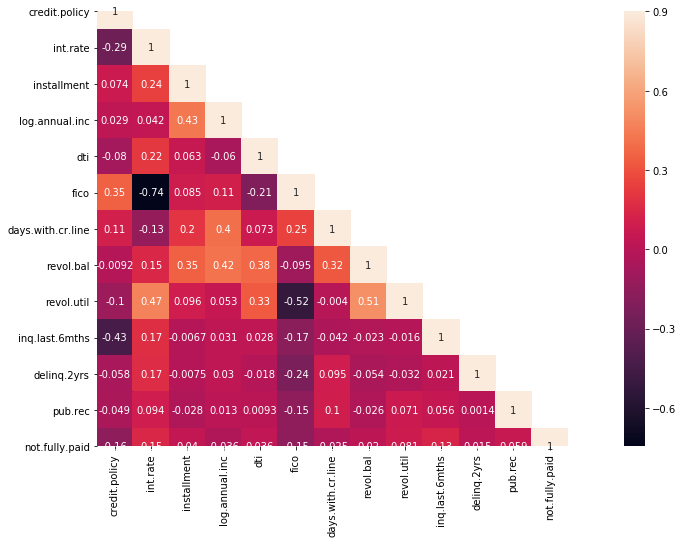

In [136]:
#create correlation with hitmap

#create correlation
corr = data.corr(method = 'spearman')

#convert correlation to numpy array
mask = np.array(corr)

#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (10,10))
fig.set_size_inches(20,8)
sns.heatmap(corr, mask = mask, vmax = 0.9, square = True, annot = True)

- Apakah variable ‘fico’ merupakan predictor yang potensial untuk memprediksi target? **Ya**
- Jelaskan argumen anda. Hint: Visualisasikan distribusi ‘fico’ terhadap target.
Berdasarkan correlation matrix diatas, dapat diketahui bahwa **variable fico memiliki nilai yang cukup besar dibandingkan variabel yang lain jika dikorelasikan dengan variabel target (not.fully.paid)** sehingga variabel fico merupakan variabel yang potensial untuk memprediksi target.

# No. 11 
Apakah variable ‘purpose’ merupakan predictor yang potensial untuk memprediksi target? Jelaskan argumen anda.

Hint: Visualisasikan proporsi setiap kategori dalam variable ‘purpose’ terhadap target. Fungsi pd.crosstab akan membantu.


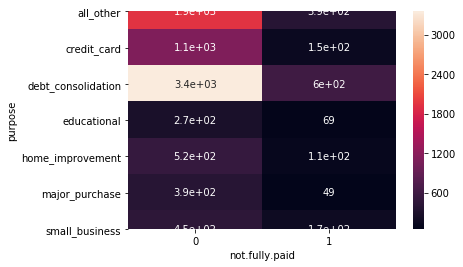

In [137]:
purpose = pd.crosstab(data['purpose'], data['not.fully.paid'])
sns.heatmap(purpose, annot=True)

In [138]:
purpose

not.fully.paid,0,1
purpose,,
all_other,1944,387
credit_card,1116,146
debt_consolidation,3354,603
educational,274,69
home_improvement,522,107
major_purchase,388,49
small_business,447,172


Berdasarkan hasil diatas, diketahui bahwa jumlah dari pinjaman yang pembayarannya lancar (pengembalian uang penuh) pada kategori (1) lebih besar dibanding pinjaman yang pembayarannya macet (pengembalian uang yang tidak penuh). <br>
<br>
Dari hasil tersebut, diketahui bahwa **variable purpose merupakan variable potensial untuk memprediksi.**

#No 12
Berapa nilai rata-rata dari int.rate untuk purpose dengan kategori ‘credit_card’?

In [139]:
avg = data[data['purpose'] == 'credit_card']
avgint = avg['int.rate'].mean()
avgint

0.11973819334389857

Nilai rata-rata dari int.rate untuk purpose dengan kategori credit card yaity 0.12.

#No. 13

In [140]:
pps = data[(data['purpose'] == 'educational') & (data['installment'] > 200)]
pps.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
166,1,educational,0.0838,315.12,10.308953,4.20,737,1560.000000,2282,19.0,1,0,0,0
171,1,educational,0.0901,572.48,10.621327,15.37,747,7500.000000,4746,18.5,2,0,0,0
184,1,educational,0.1154,211.17,11.461632,1.83,667,3421.041667,11200,23.2,1,0,0,0
252,1,educational,0.0933,575.17,11.002100,9.96,732,2732.041667,6703,47.5,1,0,0,0
312,1,educational,0.0838,293.85,9.392662,0.00,737,1139.000000,0,0.0,1,0,0,0


In [141]:
len(pps)

137

Berapa jumlah kasus pinjaman yang nilai installment-nya di atas 200 dan tujuan pinjamannya untuk pendidikan (educational) ?

**Jawaban**
137 Kasus

#No. 14
Tuliskan script untuk memfilter purpose =’credit_card’ dan simpan dalam dataframe yang disebut loans3.

In [142]:
loans3 = data[data['purpose'] == 'credit_card']
loans3.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0
17,1,credit_card,0.0894,476.58,11.608236,7.07,797,6510.958333,7586,52.7,1,0,0,0
22,1,credit_card,0.1355,339.60,11.512925,7.94,662,1939.958333,21162,57.7,0,0,0,0


#No. 15
Siapkan data untuk pemodelan.

Ubah data kategorik menjadi dummy variabel.

Buat dataframe baru bernama ‘final_data’ yang berisi seluruh features (numerik dan kategorik) dengan peubah kategorik yang sudah diubah menjadi dummy variabel.

In [0]:
final_data = pd.get_dummies(data)

In [144]:
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0


#No.16
Split final_data yang didapatkan dari soal sebelumnya menjadi data train dan data test. Proporsi data test adalah 0.30. Gunakan random_state = 101.

In [0]:
X = final_data.iloc[:, 0: 14].values # ambil kolom 2 sampai dengan kolom 8
y = final_data.iloc[:, -1].values

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

#No. 17
Buatlah sebuah instance DecisionTreeClassifier yang disebut ‘dtree’ dan buatlah model dari training data menggunakan dtree tersebut.

In [147]:
dtree = DecisionTreeClassifier()
dtree # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [148]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

#No. 18
Buatlah script untuk meprediksi target pada data test dengan menggunakan model yang telah dibuat sebelumnya, simpan dalam variable ‘predictions’

In [0]:
predictions = dtree.predict(X_test)

#No. 19
Tampilkan confusion matrix antara hasil prediksi dan target data test.

In [150]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix, recall_score, precision_score
print('Confusion Matrix')
ConMat = confusion_matrix(y_test, predictions)
print(confusion_matrix(y_test, predictions))

Confusion Matrix
[[2562  125]
 [ 126   61]]


#No. 20
Tampilkan ukuran kebaikan model, setidaknya nilai Akurasi, Sensitivity dan Specificity.

In [153]:
total=sum(sum(ConMat))
accuracy=(ConMat[0,0]+ConMat[1,1]/total)
print('Accuracy :', round(accuracy*100,2))

sensitivity=ConMat[0,0]/(ConMat[0,0]+ConMat[0,1])
print('Sensitivity :', round(sensitivity*100,2))

specificity = ConMat[1,1]/(ConMat[1,0]+ConMat[1,1])
print('Specificity :', round(specificity*100,2))

Accuracy : 256202.12
Sensitivity : 95.35
Specificity : 32.62
